# Librerias

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Extracción**

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Normalización

Se visualiza que dentro de las columnas del dataframe hay diccionarios

In [3]:
dic_cols = ['customer','phone','internet','account']

for col in dic_cols:
    temp = pd.json_normalize(df[col])
    df = pd.concat([df,temp], axis=1)
    df.drop(columns=[col], inplace = True)

df.reset_index(inplace = True,drop = True)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Transformación

## Verificar inconsistencias en los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [5]:
# Modificando Charges.Total
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [6]:
# Viendo valores nulos
df.isna().sum()

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

In [7]:
# Viendo valores duplicados
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


## Transformando los datos

In [8]:
# Crear la columna cuentas diarias dividiendo 'ChargesMonthly' por 30 y que el resultado muestre solo 2 decimales
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30
df["Cuentas_Diarias"] = df["Cuentas_Diarias"].round(2)

In [9]:

# Columnas que deben ser transformadas: sólo las estrictamente "Yes"/"No"
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


In [10]:
# Reemplazar "No phone service" por "No" en la columna MultipleLines
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()

MultipleLines
No     4202
Yes    3065
Name: count, dtype: int64

In [11]:
# Transformar "Yes"/"No" a 1/0 en MultipleLines
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})
df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [12]:
# Reemplazar valores en la columna 'Contract'
df['Contract'] = df['Contract'].replace({
    'Month-to-month': '1',
    'One year': '2',
    'Two year': '3'
})

df['Contract'] = df['Contract'].astype('int64')

df['Contract'].value_counts()

Contract
1    4005
3    1743
2    1519
Name: count, dtype: int64

In [13]:
# Columnas que se transformarán: "Sí" → 1, todo lo demás → 0
cols_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

# Aplicar transformación
for col in cols_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,2,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,1,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,1,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,1,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,1,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,2,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,1,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,1,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,3,0,Mailed check,67.85,4627.65,2.26


In [14]:
# Transformando columna Churn
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1}) 
df = df[df['Churn'].notna()]

In [15]:
# guardar archivo
df.to_csv('df_final.csv', index=False)

# Carga y Análisis

## Análisis Descriptitvo

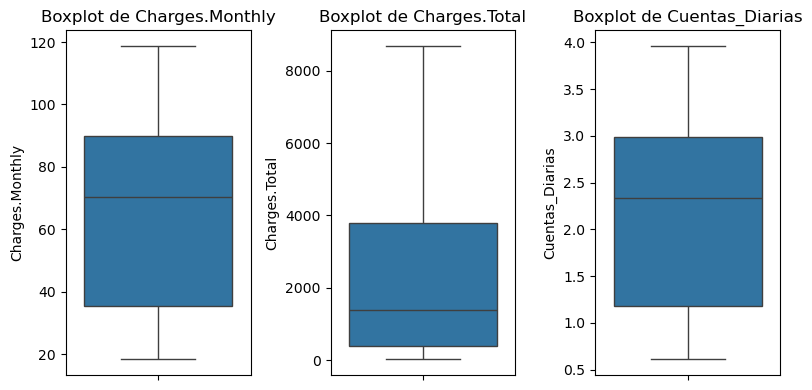

In [16]:
# Crear gráficos boxplot verticales en gráficos separados
plt.figure(figsize=(8, 4))
variables = ['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


## Distribución de Evasión

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3044\1577248385.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


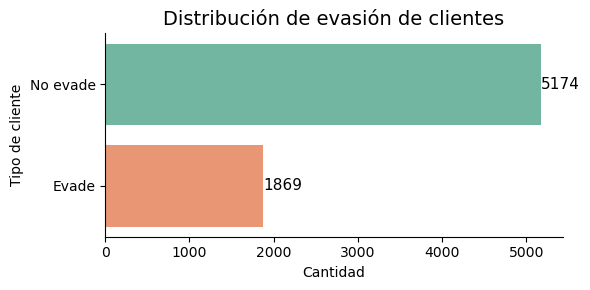

In [17]:

evasion_counts = df['Churn'].value_counts().sort_index().reset_index()
evasion_counts.columns = ['Churn', 'cantidad']
evasion_counts['Churn'] = evasion_counts['Churn'].map({0: 'No evade', 1: 'Evade'})

# Gráfico de barras horizontal
plt.figure(figsize=(6, 3))
sns.barplot(
    data=evasion_counts,
    x='cantidad',
    y='Churn',
    palette=['#66c2a5', '#fc8d62']  # Verde para "No evade", naranja para "Evade"
)

# Eliminar bordes derecho y superior
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Añadir etiquetas al final de cada barra
for i, row in evasion_counts.iterrows():
    plt.text(row['cantidad'] + 5, i, str(row['cantidad']), va='center', fontsize=11)

# Estética
plt.title('Distribución de evasión de clientes', fontsize=14)
plt.xlabel('Cantidad')
plt.ylabel('Tipo de cliente')
plt.tight_layout()
plt.show()

In [18]:
print(evasion_counts)

      Churn  cantidad
0  No evade      5174
1     Evade      1869


## Recuento de evasión por variables categóricas

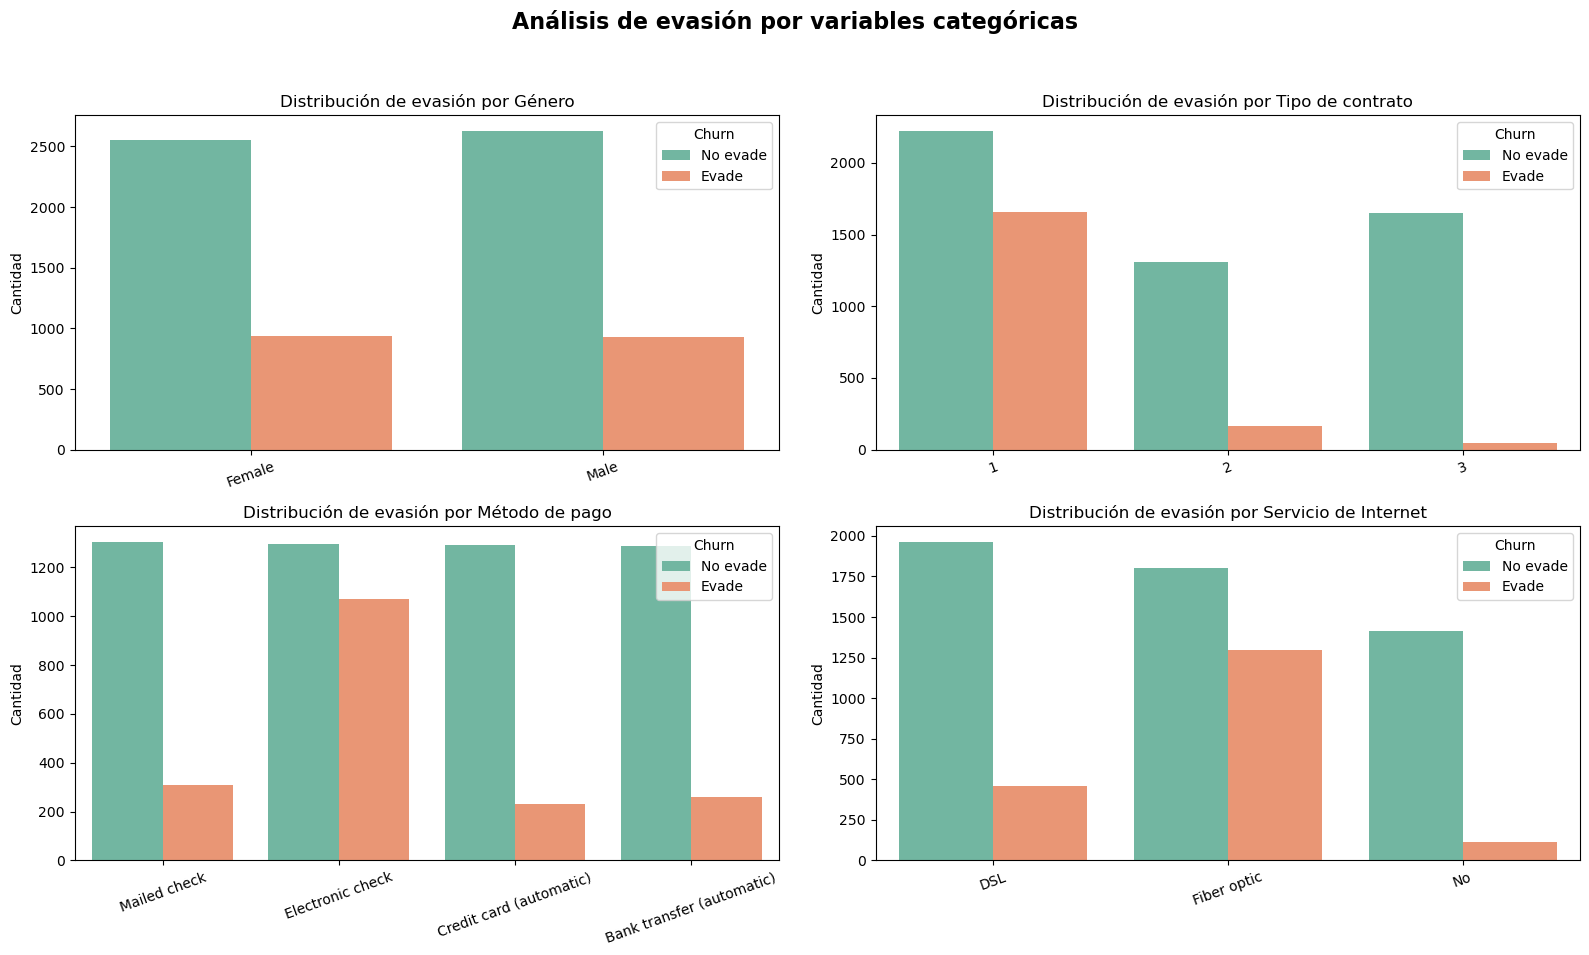

In [19]:
# Variables categóricas a analizar
variables = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

# Tamaño del layout de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

# Títulos
titulos = {
    'gender': 'Género',
    'Contract': 'Tipo de contrato',
    'PaymentMethod': 'Método de pago',
    'InternetService': 'Servicio de Internet'
}

# Colores para no evade y evade
palette = {0: '#66c2a5', 1: '#fc8d62'}  # verde y naranja

# Iterar por cada variable y graficar
for i, var in enumerate(variables):
    ax = axes[i]
    sns.countplot(data=df, x=var, hue='Churn', palette=palette, ax=ax)
    ax.set_title(f'Distribución de evasión por {titulos[var]}')
    ax.set_ylabel('Cantidad')
    ax.set_xlabel('')
    ax.legend(title='Churn', labels=['No evade', 'Evade'])
    ax.tick_params(axis='x', rotation=20)

# Ajustar diseño
plt.suptitle('Análisis de evasión por variables categóricas', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Conteo de evasión por variables numéricas

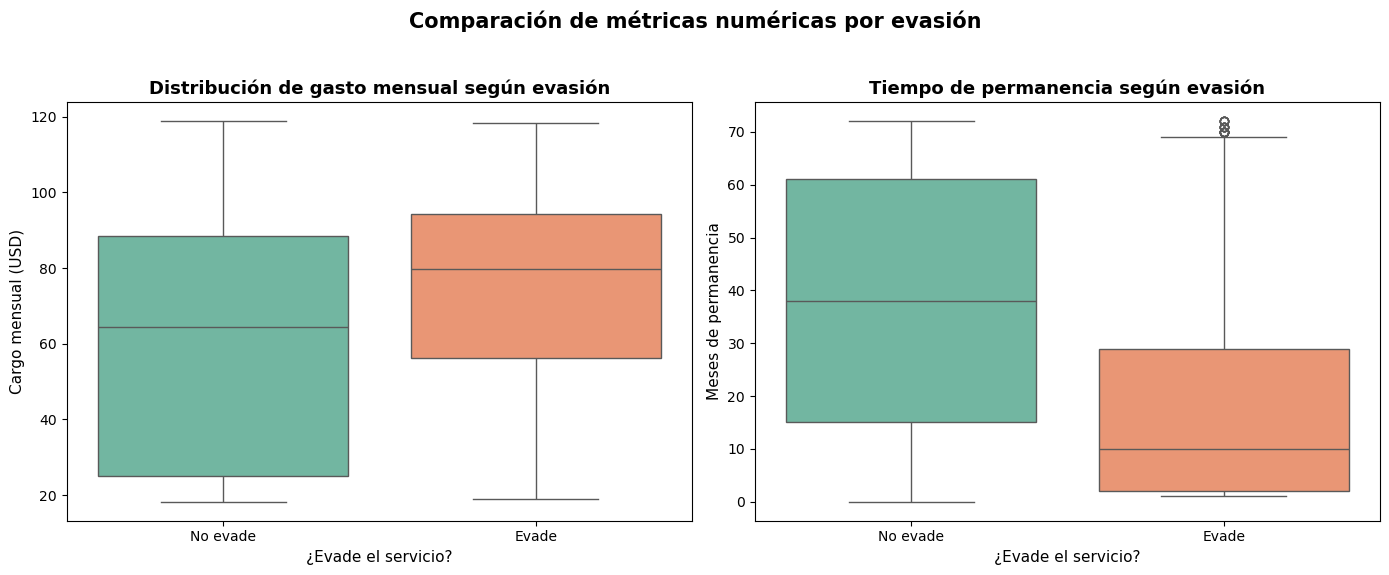

In [20]:
plt.figure(figsize=(14, 6))

# --- Gráfico 1: Gasto mensual ---
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='Charges.Monthly', hue='Churn', palette='Set2', dodge=False)
plt.title('Distribución de gasto mensual según evasión', fontsize=13, fontweight='bold')
plt.xlabel('¿Evade el servicio?', fontsize=11)
plt.ylabel('Cargo mensual (USD)', fontsize=11)
plt.xticks([0, 1], ['No evade', 'Evade'])
plt.legend().remove()

# --- Gráfico 2: Tiempo de permanencia ---
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='tenure', hue='Churn', palette='Set2', dodge=False)
plt.title('Tiempo de permanencia según evasión', fontsize=13, fontweight='bold')
plt.xlabel('¿Evade el servicio?', fontsize=11)
plt.ylabel('Meses de permanencia', fontsize=11)
plt.xticks([0, 1], ['No evade', 'Evade'])
plt.legend().remove()

plt.suptitle('Comparación de métricas numéricas por evasión', fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



# Informe Final


## Churn de Clientes – Telecom X

---

## 1. 📥 Extracción de Datos

**Fuente de datos**  
Los datos fueron extraídos desde un archivo JSON disponible públicamente:

```python
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

## 2. 🔄 Transformación de Datos (T - Transform)

### 📦 a) Normalización de Estructuras Anidadas
Se identificaron columnas con estructuras anidadas (`customer`, `phone`, `account`, `internet`) que fueron **normalizadas e integradas** al DataFrame principal para facilitar el análisis y asegurar consistencia estructural.

---

### 🧹 b) Limpieza de Datos

- **Valores nulos y duplicados**: No se encontraron nulos ni duplicados en `CustomerID`.
- **Corrección de tipos de datos**:  
  - Columnas como `Charges.Total` y `Charges.Monthly` estaban en formato `object`, pero fueron convertidas a tipo `float`.
- **Depuración**: Las columnas originales se eliminaron luego de la transformación.

---

### 🔁 c) Transformación de Variables Categóricas

- **Conversión a binario (0/1)** para variables como:
  - `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, `MultipleLines`
- **Otras variables categóricas** como `OnlineSecurity`, `TechSupport`, etc., también fueron transformadas al mismo formato binario.
- **Codificación de contrato (`Contract`)**:
  - `'Month-to-month'` → `1`  
  - `'One year'` → `2`  
  - `'Two year'` → `3`
- **Estandarización de `Churn`**:
  - Se cambio los valores `Yes` y `No` a **1** y **0**.


## 3. 💾 Carga de Datos (L - Load)

El DataFrame ya procesado se almacenó localmente en formato `csv` con el siguiente comando:

```python
df.to_csv('Churn_de_Clientes.json', index=False)

## 📊 Análisis Descriptivo

Este análisis tiene como objetivo explorar cómo se comportan ciertas variables en relación con la evasión de clientes (`Churn`). Se utilizó una combinación de gráficos boxplot y de barras para identificar patrones relevantes.

---

### 1. 📦 Distribución de Variables Numéricas

Se construyeron **boxplots** individuales para visualizar la distribución de las siguientes variables:

- `Charges.Monthly`: gasto mensual del cliente.
- `Charges.Total`: gasto total acumulado.
- `Cuentas_Diarias`: promedio diario de gasto.

Estos gráficos permiten identificar **valores atípicos (outliers)** y diferencias en la dispersión de cada variable.

---

### 2. 📉 Distribución General de Evasión

Se generó un **gráfico de barras horizontal** que muestra cuántos clientes abandonaron el servicio (`Evade`) y cuántos no (`No evade`).  
El gráfico incorpora mejoras estéticas como la eliminación de bordes y etiquetas numéricas sobre cada barra.

---

### 3. 🔍 Análisis por Variables Categóricas

Para entender qué perfiles tienen mayor probabilidad de evasión, se analizaron las siguientes variables categóricas:

- **Género** (`Gender`)
- **Tipo de contrato** (`Contract`)
- **Método de pago** (`PaymentMethod`)
- **Tipo de servicio de internet** (`InternetService`)

Cada gráfico muestra la distribución de clientes que **evaden** y **no evaden** dentro de cada categoría.  
Se utilizó una **paleta de colores verde/naranja** para facilitar la interpretación.

---

### 4. 🧮 Análisis por Variables Numéricas y Evasión

Se crearon **dos boxplots comparativos**, esta vez diferenciando entre clientes que evadieron y los que no:

- 📌 **Gasto mensual (`Charges.Monthly`)**:  
  Los clientes que abandonaron tienden a tener **cargos mensuales más altos**.

- ⏱️ **Tenure (meses de permanencia)**:  
  Aquellos que **permanecen** tienen una **antigüedad mayor** en comparación con los que evaden.

Este análisis permite observar que tanto el nivel de gasto como la duración del servicio pueden estar relacionados con la evasión.

---

## ✅ Conclusión

El análisis integral realizado sobre los datos de clientes de Telecom X permite evidenciar patrones claros asociados al fenómeno de la evasión (`Churn`). A través del proceso ETL se logró estructurar una base de datos limpia, consistente y adecuada para el análisis.

Posteriormente, el análisis exploratorio reveló que los clientes con contratos mensuales, menor tiempo de permanencia y cargos mensuales elevados presentan una mayor probabilidad de abandonar el servicio. Asimismo, ciertas características como el tipo de servicio de internet, el método de pago y la ausencia de servicios complementarios (como soporte técnico o seguridad en línea) también se correlacionan con tasas más altas de evasión.

Estos hallazgos ofrecen una base sólida para desarrollar modelos predictivos más robustos y estrategias de retención orientadas a perfiles de alto riesgo, contribuyendo directamente a la sostenibilidad y competitividad de la empresa.
